In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movie-rating-dataset/users.dat
/kaggle/input/movie-rating-dataset/ratings.dat
/kaggle/input/movie-rating-dataset/README
/kaggle/input/movie-rating-dataset/movies.dat
/kaggle/input/result/result.csv


<h3><b>Read the data from the file "movies.dat"</b></h3>

In [2]:
df_movies = pd.read_table('/kaggle/input/movie-rating-dataset/movies.dat', sep="::", encoding='latin1', engine='python',header=None)

<h3><b>Renaming the columns of the DataFrame</b></h3>

In [3]:
df_movies = df_movies.rename(columns={0:'MovieID',1:'Title',2:'Genres'})
df_movies

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


<h3><b>Read the data from the file "ratings.dat"</b></h3>

In [4]:
df_ratings = pd.read_table('/kaggle/input/movie-rating-dataset/ratings.dat', sep="::", encoding='latin1', engine='python',header=None)

#Renaming the columns of the DataFrame
df_ratings = df_ratings.rename(columns={0:'UserID',1:'MovieID',2:'Rating',3:'Timestamp'})
df_ratings

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


<h3><b>Read the data from the file "users.dat"</b></h3>

In [5]:
df_users = pd.read_table('/kaggle/input/movie-rating-dataset/users.dat', sep="::", encoding='latin1', engine='python',header=None)
df_users = df_users.rename(columns={0:'UserID',1:'Gender',2:'Age',3:'Occupation',4:'Zip-code'})
df_users

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


<h3><b>Merging movie and rating dataframe</b></h3>

In [6]:
df_new = pd.merge(df_movies, df_ratings, on='MovieID')
df_new

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474
...,...,...,...,...,...,...
1000204,3952,"Contender, The (2000)",Drama|Thriller,5812,4,992072099
1000205,3952,"Contender, The (2000)",Drama|Thriller,5831,3,986223125
1000206,3952,"Contender, The (2000)",Drama|Thriller,5837,4,1011902656
1000207,3952,"Contender, The (2000)",Drama|Thriller,5927,1,979852537


<h3><b>Count the number of ratings for each title </b></h3>

In [7]:
df_new.groupby('Title')['Rating'].count().sort_values(ascending=False)

Title
American Beauty (1999)                                       3428
Star Wars: Episode IV - A New Hope (1977)                    2991
Star Wars: Episode V - The Empire Strikes Back (1980)        2990
Star Wars: Episode VI - Return of the Jedi (1983)            2883
Jurassic Park (1993)                                         2672
                                                             ... 
Target (1995)                                                   1
I Don't Want to Talk About It (De eso no se habla) (1993)       1
An Unforgettable Summer (1994)                                  1
Never Met Picasso (1996)                                        1
Full Speed (1996)                                               1
Name: Rating, Length: 3706, dtype: int64

<h3><b>Each row represents a title and its corresponding mean rating.</b></h3>

In [8]:
ratings = pd.DataFrame(df_new.groupby('Title')['Rating'].mean())
ratings

,Rating
Title,
"$1,000,000 Duck (1971)",3.027027
'Night Mother (1986),3.371429
'Til There Was You (1997),2.692308
"'burbs, The (1989)",2.910891
...And Justice for All (1979),3.713568
...,...
"Zed & Two Noughts, A (1985)",3.413793
Zero Effect (1998),3.750831
Zero Kelvin (Kjærlighetens kjøtere) (1995),3.500000


<h3><b>Each row represents a title and its corresponding mean rating and number of ratings.</b></h3>

In [9]:
ratings['num of ratings'] = pd.DataFrame(df_new.groupby('Title')['Rating'].count())
ratings.head()

,Rating,num of ratings
Title,,
"$1,000,000 Duck (1971)",3.027027,37
'Night Mother (1986),3.371429,70
'Til There Was You (1997),2.692308,52
"'burbs, The (1989)",2.910891,303
...And Justice for All (1979),3.713568,199


<h3><b>Distribution of the Number of Ratings Data</b></h3>

<Axes: >

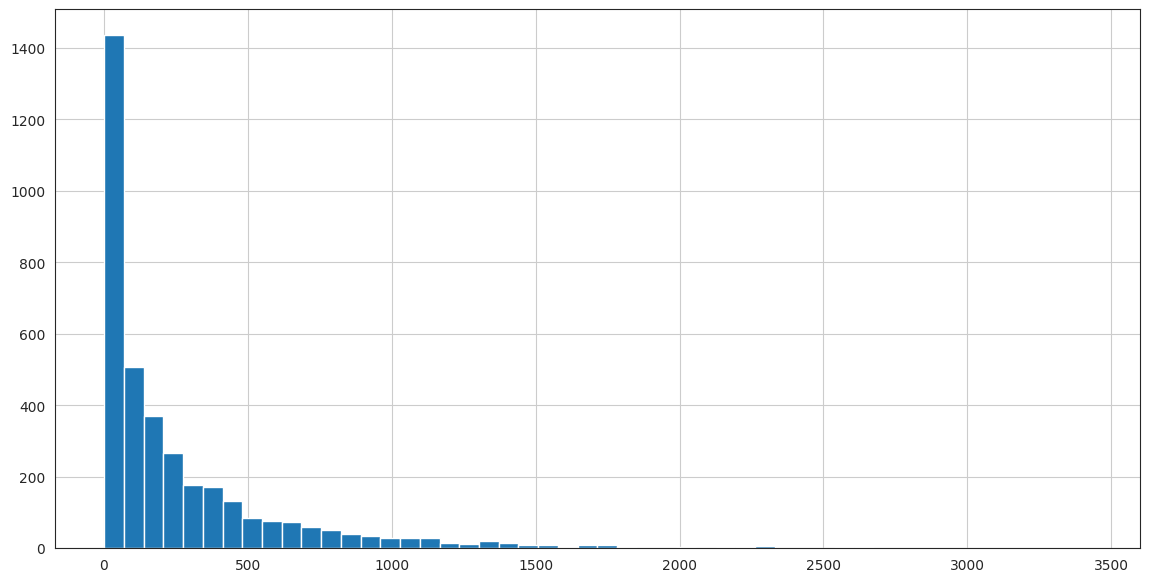

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline
plt.figure(figsize=(14,7))
ratings['num of ratings'].hist(bins=50)

<h3><b>Distribution of the Ratings Data( As we can see it is roughly following the Normal Distribution)</b></h3>

<Axes: >

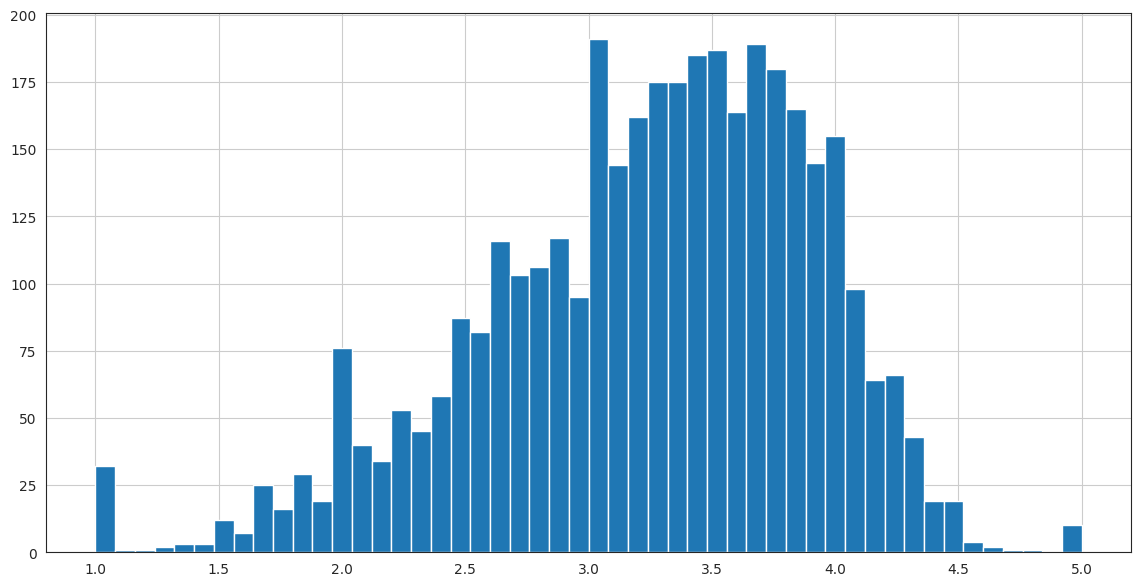

In [11]:
plt.figure(figsize=(14,7))
ratings['Rating'].hist(bins=50)

<h3><b>This is a joint plot between Ratings and Number of Ratings to show the concentration of the ratings at a particular region</b></h3>

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


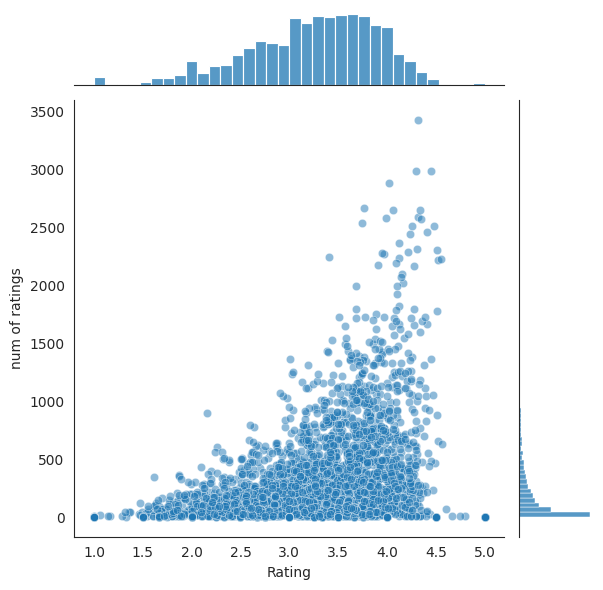

In [12]:
sns.jointplot(x='Rating',y='num of ratings',data=ratings,alpha=0.5)

<h3><b>Creating a dataframe between UserID and MovieID</b></h3>

In [13]:
user_movie_matrix = df_new.pivot_table(index='UserID',columns='Title',values='Rating').fillna(0)
user_movie_matrix

Title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
UserID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,0.0,3.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
6037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h3><b>Graph plot between Frequency of Non-zero Ratings per Movie</b></h3>

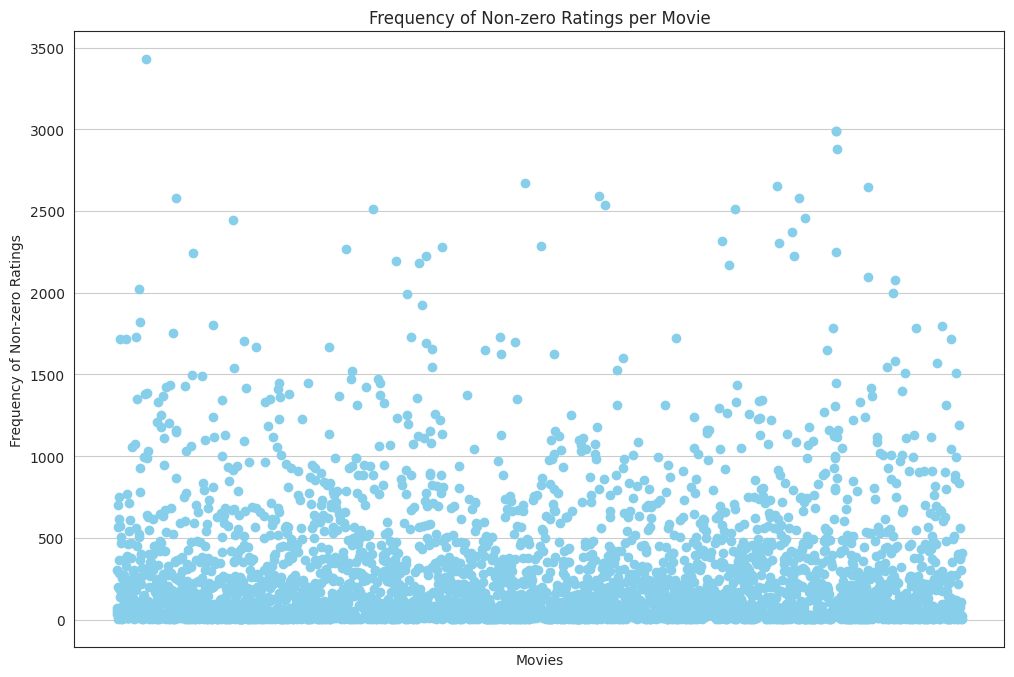

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have user_movie_matrix DataFrame

# Compute count of non-zero values for each column
non_zero_counts = user_movie_matrix.astype(bool).sum(axis=0)

# Plot histogram
plt.figure(figsize=(12, 8))
plt.scatter(non_zero_counts.index, non_zero_counts, color='skyblue')
plt.xlabel('Movies')
plt.ylabel('Frequency of Non-zero Ratings')
plt.title('Frequency of Non-zero Ratings per Movie')
plt.xticks([])  # Rotate x-axis labels for better visibility
plt.grid(axis='y')  # Only show grid on the y-axis
plt.show()

<h3><b>Appending the new row to the DataFrame</b></h3>

In [15]:
new_row_index = len(user_movie_matrix)  # Index for the new row
new_row_values = [0] * len(user_movie_matrix.columns)  # Values for the new row

# Appending the new row to the DataFrame
user_movie_matrix.loc[new_row_index+1] = new_row_values

In [16]:
user_movie_matrix

Title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
UserID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h4><b>Adding movies and ratings for the new user</b></h4>

In [17]:
print("Enter 4 movies you have watched and also their rating")
n = 4
index_number = 6041
for i in range(n):
    user_input_value = input("Enter the name of the movie you have watched to get recommendation on newer movies : ")
    user_rating = float(input("Give the Rating : "))
    print(user_rating)
    user_movie_matrix.at[index_number, user_input_value] = user_rating

Enter 4 movies you have watched and also their rating


Enter the name of the movie you have watched to get recommendation on newer movies :  X-Men (2000)
Give the Rating :  5


5.0


Enter the name of the movie you have watched to get recommendation on newer movies :  Star Wars: Episode IV - A New Hope (1977)
Give the Rating :  5


5.0


Enter the name of the movie you have watched to get recommendation on newer movies :  Jurassic Park (1993)
Give the Rating :  5


5.0


Enter the name of the movie you have watched to get recommendation on newer movies :  Back to the Future (1985)
Give the Rating :  5


5.0


<h3><b>Printing the user_movie_matrix</b></h3>

In [18]:
user_movie_matrix

Title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
UserID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<h3><b>Normalizing the dataframe row-wise to remove the bias of all the users </b></h3>

In [19]:
user_movie_matrix_norm = user_movie_matrix.subtract(user_movie_matrix.mean(axis=1), axis = 'rows')
user_movie_matrix_norm

Title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
UserID,,,,,,,,,,,,,,,,,,,,,
1,-0.059903,-0.059903,-0.059903,-0.059903,-0.059903,-0.059903,-0.059903,-0.059903,-0.059903,-0.059903,...,-0.059903,-0.059903,-0.059903,-0.059903,-0.059903,-0.059903,-0.059903,-0.059903,-0.059903,-0.059903
2,-0.129250,-0.129250,-0.129250,-0.129250,-0.129250,-0.129250,-0.129250,-0.129250,-0.129250,-0.129250,...,-0.129250,-0.129250,-0.129250,-0.129250,-0.129250,-0.129250,-0.129250,-0.129250,-0.129250,-0.129250
3,-0.053697,-0.053697,-0.053697,-0.053697,-0.053697,-0.053697,-0.053697,-0.053697,-0.053697,-0.053697,...,-0.053697,-0.053697,-0.053697,-0.053697,-0.053697,-0.053697,-0.053697,-0.053697,-0.053697,-0.053697
4,-0.023745,-0.023745,-0.023745,-0.023745,-0.023745,-0.023745,-0.023745,-0.023745,-0.023745,-0.023745,...,-0.023745,-0.023745,-0.023745,-0.023745,-0.023745,-0.023745,-0.023745,-0.023745,-0.023745,-0.023745
5,-0.168106,-0.168106,-0.168106,-0.168106,-0.168106,-0.168106,-0.168106,-0.168106,-0.168106,-0.168106,...,-0.168106,-0.168106,-0.168106,-0.168106,-0.168106,-0.168106,-0.168106,-0.168106,-0.168106,-0.168106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6037,-0.202644,-0.202644,-0.202644,-0.202644,-0.202644,-0.202644,-0.202644,-0.202644,-0.202644,3.797356,...,-0.202644,-0.202644,-0.202644,-0.202644,-0.202644,-0.202644,-0.202644,-0.202644,-0.202644,-0.202644
6038,-0.020507,-0.020507,-0.020507,-0.020507,-0.020507,-0.020507,-0.020507,-0.020507,-0.020507,-0.020507,...,-0.020507,-0.020507,-0.020507,-0.020507,-0.020507,-0.020507,-0.020507,-0.020507,-0.020507,-0.020507
6039,-0.128710,-0.128710,-0.128710,-0.128710,-0.128710,-0.128710,-0.128710,-0.128710,-0.128710,-0.128710,...,-0.128710,2.871290,-0.128710,-0.128710,-0.128710,-0.128710,-0.128710,-0.128710,-0.128710,-0.128710


<h3><b>Pearson_correlation and cosine_similarity has been implemented from scratch</b></h3>

In [20]:
def pearson_correlation(user_ratings, other_user_ratings):
    # Mean of user ratings
    mean_user = np.mean(user_ratings)
    mean_other_user = np.mean(other_user_ratings)
    
    # Compute covariance
    cov = np.sum((user_ratings - mean_user) * (other_user_ratings - mean_other_user))
    
    # Compute standard deviations
    std_user = np.sqrt(np.sum((user_ratings - mean_user) ** 2))
    std_other_user = np.sqrt(np.sum((other_user_ratings - mean_other_user) ** 2))
    
    # Compute Pearson correlation coefficient
    pearson_corr = cov / (std_user * std_other_user)
    
    return pearson_corr


def cosine_similarity(user_ratings, other_user_ratings):
    # Compute dot product between the two vectors
    dot_product = np.dot(user_ratings, other_user_ratings)
    
    # Compute magnitudes of each vector
    magnitude_user = np.sqrt(np.sum(user_ratings ** 2))
    magnitude_other_user = np.sqrt(np.sum(other_user_ratings ** 2))
    
    # Compute cosine similarity
    cosine_sim = dot_product / (magnitude_user * magnitude_other_user)
    
    return cosine_sim

<h3><b>Computing Pearson correlation between the new user and other users in the user dataframe</b><h3>

In [21]:
# Choose a particular user
user_id = 6041

# Select the row corresponding to the chosen user
user_ratings = user_movie_matrix_norm.iloc[user_id-1]

# Compute Pearson correlation with other users

user_similarity = {}
for other_user_id, other_user_ratings in user_movie_matrix_norm.iterrows():
    if other_user_id != user_id:
        similarity = pearson_correlation(user_ratings, other_user_ratings)
        user_similarity[other_user_id] = similarity
        
        

# Remove the user's own similarity score from the dictionary
user_similarity.pop(user_id, None)

# Convert the dictionary to a pandas Series
user_similarity = pd.Series(user_similarity)
# Take a look at the data
user_similarity.head()



1    0.142890
2    0.052211
3    0.206607
4    0.225609
5    0.014464
dtype: float64

<h3><b>The similar users for user 6041:</b></h3>

In [22]:
# Number of similar users
n = 10
# Get top n similar users
similar_users = user_similarity.sort_values(ascending=False)[:n]
# Print out top n similar users
print(f'The similar users for user {user_id} are \n:', similar_users)

The similar users for user 6041 are 
: 3954    0.404070
206     0.387683
5477    0.378416
4012    0.361444
4065    0.355955
3040    0.355448
790     0.350692
160     0.342459
762     0.341501
2893    0.324524
dtype: float64


In [23]:
# Movies that similar users watched. Remove movies that none of the similar users have watched
similar_user_movies = user_movie_matrix_norm[user_movie_matrix_norm.index.isin(similar_users.index)].dropna(axis=1, how='all')
similar_user_movies

Title,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kjærlighetens kjøtere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
UserID,,,,,,,,,,,,,,,,,,,,,
160,-0.018888,-0.018888,-0.018888,-0.018888,-0.018888,-0.018888,-0.018888,-0.018888,-0.018888,-0.018888,...,-0.018888,-0.018888,-0.018888,-0.018888,-0.018888,-0.018888,-0.018888,-0.018888,-0.018888,-0.018888
206,-0.024825,-0.024825,-0.024825,-0.024825,-0.024825,-0.024825,-0.024825,-0.024825,-0.024825,-0.024825,...,-0.024825,-0.024825,-0.024825,-0.024825,-0.024825,-0.024825,-0.024825,-0.024825,-0.024825,-0.024825
762,-0.046141,-0.046141,-0.046141,-0.046141,-0.046141,-0.046141,-0.046141,-0.046141,-0.046141,-0.046141,...,-0.046141,-0.046141,-0.046141,-0.046141,-0.046141,-0.046141,-0.046141,-0.046141,-0.046141,-0.046141
790,-0.026983,-0.026983,-0.026983,-0.026983,-0.026983,-0.026983,-0.026983,-0.026983,-0.026983,-0.026983,...,-0.026983,-0.026983,-0.026983,-0.026983,-0.026983,-0.026983,-0.026983,-0.026983,-0.026983,-0.026983
2893,-0.021856,-0.021856,-0.021856,-0.021856,-0.021856,-0.021856,-0.021856,-0.021856,-0.021856,4.978144,...,-0.021856,-0.021856,-0.021856,-0.021856,-0.021856,-0.021856,-0.021856,-0.021856,-0.021856,-0.021856
3040,-0.023206,-0.023206,-0.023206,-0.023206,-0.023206,-0.023206,-0.023206,-0.023206,-0.023206,-0.023206,...,-0.023206,-0.023206,-0.023206,-0.023206,-0.023206,-0.023206,-0.023206,-0.023206,-0.023206,-0.023206
3954,-0.039935,-0.039935,-0.039935,-0.039935,-0.039935,-0.039935,-0.039935,-0.039935,-0.039935,-0.039935,...,-0.039935,-0.039935,-0.039935,-0.039935,-0.039935,-0.039935,-0.039935,-0.039935,-0.039935,-0.039935
4012,-0.044253,-0.044253,-0.044253,-0.044253,-0.044253,-0.044253,-0.044253,-0.044253,-0.044253,-0.044253,...,-0.044253,-0.044253,-0.044253,-0.044253,-0.044253,-0.044253,-0.044253,-0.044253,-0.044253,-0.044253
4065,-0.023745,-0.023745,-0.023745,-0.023745,-0.023745,-0.023745,-0.023745,-0.023745,-0.023745,-0.023745,...,-0.023745,-0.023745,-0.023745,-0.023745,-0.023745,-0.023745,-0.023745,-0.023745,-0.023745,-0.023745


<h3><b>Top recommendations using movie score</b></h3>

In [24]:
# A dictionary to store movie scores
item_score = {}

# Loop through the similar movies
for i in similar_user_movies.columns:
    
  # Retrieve the ratings for movie i
  movie_rating = similar_user_movies[i]
    
  # Create a variable to store the movie score
  total = 0
    
  # Create a variable to store the number of scores
  count = 0
    
  # Loop through similar users
  for u in similar_users.index:
        
    # Score is the sum of user similarity score multiply by the movie rating
    score = similar_users[u] * movie_rating[u]
    
    # Add the score to the total score for the movie so far
    total += score
    count +=1
    
  # Get the average score for the item
  item_score[i] = total / count # Formula: Summation(user_similarity_value * rating given by the user)/total number of similar users.
    
# Convert dictionary to pandas dataframe
item_score = pd.DataFrame(item_score.items(), columns=['movie', 'movie_score'])
    
# Sort the movies by score
top_recommended_movies = item_score.sort_values(by='movie_score', ascending=False)

top_recommended_movies.rename(columns={'movie': 'Title'}, inplace=True)

temp_df = top_recommended_movies[['Title']].copy()

top_recommended_movies_genre = pd.merge(temp_df, df_movies, on='Title')


top_recommended_movies_genre.drop(columns=['MovieID'], inplace=True)


# Select top k movies
k = 20
top_recommended_movies_genre.head(k) # Removing the n movies the user had given rating on.

,Title,Genres
0,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi
1,X-Men (2000),Action|Sci-Fi
2,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Drama|Sci-Fi|War
3,Jurassic Park (1993),Action|Adventure|Sci-Fi
4,Back to the Future (1985),Comedy|Sci-Fi
5,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Romance|Sci-Fi|War
6,"Matrix, The (1999)",Action|Sci-Fi|Thriller
7,Alien (1979),Action|Horror|Sci-Fi|Thriller
8,Star Wars: Episode I - The Phantom Menace (1999),Action|Adventure|Fantasy|Sci-Fi
9,Terminator 2: Judgment Day (1991),Action|Sci-Fi|Thriller
